# <span style="color:#25dbea "> Źródło </span>


https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

autor: Patryk Bednarski

# <span style="color:#25dbea "> Biblioteki </span>

In [9]:
import os
import pandas as pd
from tqdm import tqdm
import nltk
from nltk import word_tokenize

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np 
import seaborn as sns

In [12]:
from collections import Counter

In [13]:
from nltk.corpus import stopwords

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PLK077069\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# <span style="color:#25dbea "> Wczytanie i eksploracja danych </span>

### <span style="color: #25ea3a"> Wczytanie danych i wstępne zapoznanie </span>

https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

In [15]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [16]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


Zbiór danych przedstawia oceny hoteli na portalu Tripadvisor.

W kolumnie Review zapisana została pisemna recenczja hotelu pozostawiona przez użytkownika.

W kolumnie Rating znajduje się liczbowa ocena w skali 1 - 5, gdzie 5 jest oceną najlepszą.

In [17]:
# Liczba wierszy w data frame
len(df.Review)

20491

In [18]:
# sprawdzanie brakujących wartości
df['Review'].isnull().sum()

0

In [19]:
## Badanie przykładowego rekordu
### Wyświetlenie zawartości kolumny Review z wiersza o indeksie 1
df['Review'].iloc[1]

'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bu

In [20]:
## Ilość znaków w przykładowym rekordzie
len(df['Review'].iloc[1])

1689

In [21]:
## Ilość słów w przykładowym rekordzie
len(df['Review'].iloc[1].split())

250

### <span style="color: #25ea3a"> Liczba znaków w kolumnie Review </span>

In [22]:
# Liczba ZNAKÓW w rekordach z kolumny Review dla 10 pierwszych rzędów
df['Review'].head(10).str.len()

0     593
1    1689
2    1427
3     600
4    1281
5    1002
6     748
7     597
8     419
9     271
Name: Review, dtype: int64

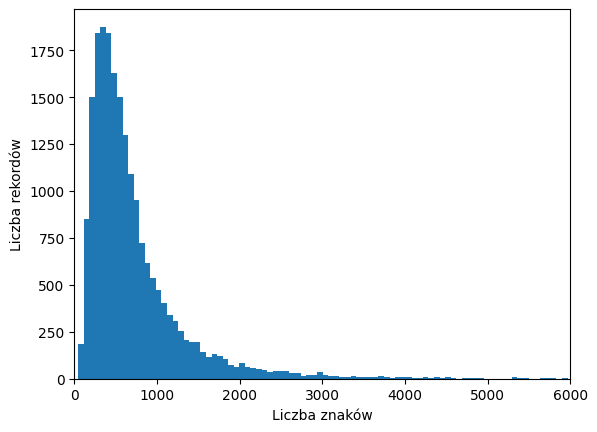

In [23]:
# Histogram obrazujący ilość rekordów (oś Y) 
# z określoną liczbą znaków (oś X) w kolumnie Review.
plt.hist(df['Review'].str.len(), bins = 200)
plt.xlim(0, 6000) # ogarniczenie osi X do 6000 dla lepszej widoczności
plt.xlabel('Liczba znaków')
plt.ylabel('Liczba rekordów')
plt.show()

In [24]:
# Analiza rozkładu liczby znaków w rekordach
liczba_znakow = df['Review'].str.len()
liczba_znakow.describe()

count    20491.000000
mean       724.896833
std        689.101024
min         44.000000
25%        339.000000
50%        537.000000
75%        859.000000
max      13501.000000
Name: Review, dtype: float64

Łącznie w pliku znajduje się 20491 rekordów.
Średnio występuje ok 725 znaków przypisanych do jednej recencji hotelu.
50% danych znajdujących w przedziale IQR (między 25% a 75% percentylem) mieści się w przedziale między 339 a 859 znaków. 
Występują znaczące wartości odstające jak mininalna wartośći 44 znaków oraz maksymalna 13501 znaków.

### <span style="color: #25ea3a"> Liczba słów w kolumnie Review </span>

In [25]:
# Liczba słów w rekordach z kolumny Review dla 10 pierwszych rzędów
df['Review'].head(10).str.split().str.len()

0     87
1    250
2    217
3     89
4    191
5    134
6    101
7     85
8     59
9     35
Name: Review, dtype: int64

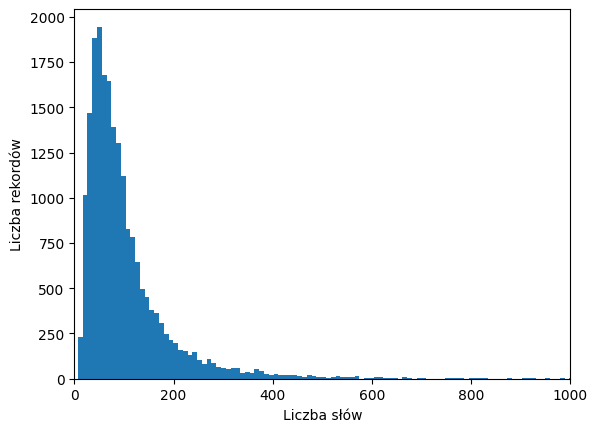

In [26]:
# Histogram obrazujący ilość rekordów (oś Y) 
# z określoną liczbą słów (oś X) w kolumnie Review.
plt.hist(df['Review'].str.split().str.len(), bins = 200)
plt.xlim(0, 1000) # ograniczenie osi X do wartości 1000 dla lepszej widoczności
plt.xlabel('Liczba słów')
plt.ylabel('Liczba rekordów')
plt.show()

In [27]:
# Analiza rozkładu liczby znaków w rekordach
liczba_slow = df['Review'].str.split().str.len()
liczba_slow.describe()

count    20491.000000
mean       104.375824
std        100.656586
min          7.000000
25%         48.000000
50%         77.000000
75%        124.000000
max       1931.000000
Name: Review, dtype: float64

Ponownie widać wysokie wartości odstające.
W przedziale IQR znajdują się rekordy z liczbą słów między 48 a 124, jednak minimalna ilosc słów wynosi 7, a maksymalna aż 1931. Średnia wynosi 104, więc widać, że większość rekordów znajduje się w przedziale IQR.

### <span style="color: #25ea3a"> Analiza kolumny Rating </span>

In [28]:
df['Rating'].describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [29]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

W zbiorze danych najwięcej rekordów otrzymało w kolumnie Rating ocenę 5 - łacznie jest to 9054 rekordów.

Jest to więcej niż suma rekordów z ocenami miedzy 1 a 3, która daje łącznie wartość 5398 rekordów.

Dużej ilości rekordów przypisano także ocenę 4, dlatego ogólna średnia dla wszystkich rekordów jest bliższa wyżym ocenom (średnia to 3.95).



### <span style="color: #25ea3a"> Licznik słów </span>

In [30]:
corpus = []
for x in df['Review'].str.split():
    corpus.extend(x)

In [31]:
counter=Counter(corpus)
most=counter.most_common()
print(most[0:10])

[('hotel', 42079), ('not', 30750), ('room', 30532), ('great', 18732), ("n't", 18436), ('staff', 14950), ('good', 14791), ('did', 13433), ('just', 12458), ('stay', 11376)]


3 najczęściej występujące słowa to "hotel" - 42 tys razy, "not" - 30 tys., "room" - 30 tys 

In [32]:
# 40 najczęściej występujących słów w korpusie
first_n = 40
x, y= [], []
for word,count in most[:first_n]:
        x.append(word)
        y.append(count)

C:\Users\PLK077069\AppData\Local\Temp\ipykernel_19500\3654772503.py:3: UserWarning: 
The palette list has fewer values (6) than needed (40) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=y,y=x, hue=x, legend=False, palette=custom_palette)


40 najczęściej występujących slów w korpusie


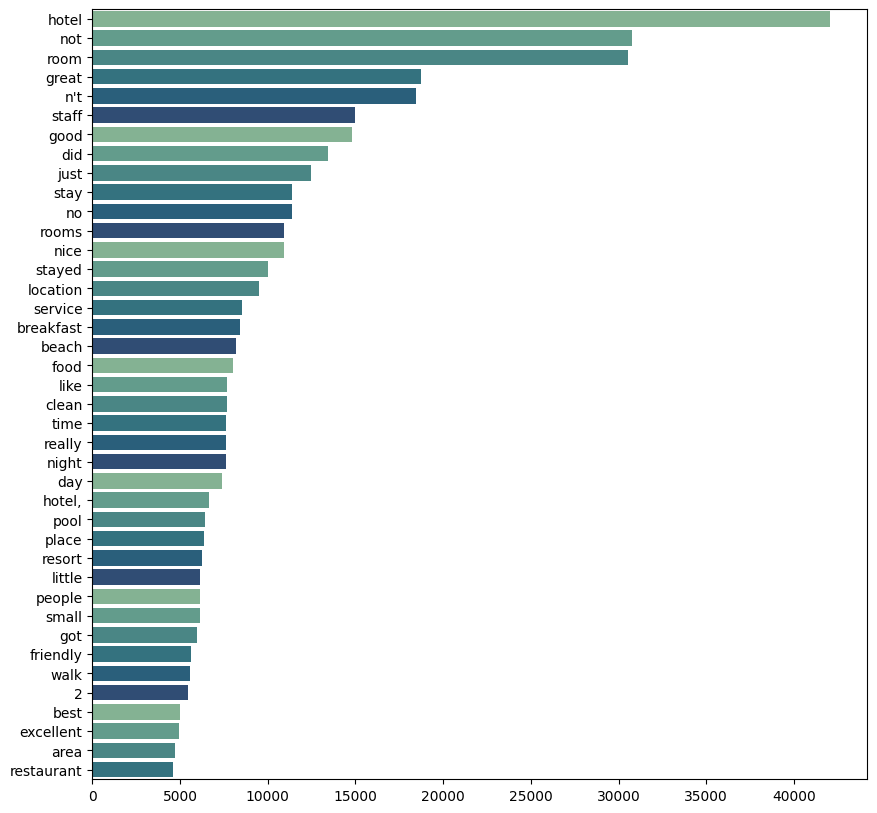

In [33]:
plt.figure(figsize=(10, 10))
custom_palette = sns.color_palette("crest") # paleta kolorów seaborn
sns.barplot(x=y,y=x, hue=x, legend=False, palette=custom_palette)
print(f"{first_n} najczęściej występujących slów w korpusie")

Analizując kilka rekordów, zauważyć można nieobecność "stopwords", które musiały zostać usunięte przez twórców datasetu.

# <span style="color:#25dbea "> Analiza Sentymentu </span>

### <span style="color: #25ea3a"> Tworzenie przykładów - pozytywnego, negatywnego i neutralnego  </span>

In [34]:
neg_example = df['Review'].iloc[15] # Hotel oceniony na 1 w Rating
neg_example

'horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend, friend checked room hours earlier came later, pulled valet young man just stood, asked valet open said, pull bags didn__Ç_é_ offer help, got garment bag suitcase came car key room number says not valet, car park car street pull, left key working asked valet park car gets, went room fine bottle champagne oil lotion gift spa, dressed went came got bed noticed blood drops pillows sheets pillows, disgusted just unbelievable, called desk sent somebody 20 minutes later, swapped sheets left apologizing, sunday morning called desk speak management sheets aggravated rude, apparently no manager kind supervisor weekend wait monday morning, young man spoke said cover food adding person changed sheets said fresh blood rude tone, checkout 3pm package booked, 12 1:30 staff maids tried walk room opening door apologizin

In [35]:
poz_example = df['Review'].iloc[17] # hotel oceniony na 5 w Rating
poz_example

"fantastic stay monaco seattle hotel monaco holds high standards kimpton hotel line, having stayed kimpton hotels cities easily say seattle hotel monaco best seen, service attentive prompt, based member kimpton loyalty program upgraded 10th floor room great view 4th street excellent public library kitty-corner hotel, highly recommend tour public library blown away, room quite spacious beautiful flat-screen television dvd/cd player, exercise room pretty standard kimpton size means adequate not outstanding eliptical cardio machines stationary bikes personal viewing screens, cardio machine screens accept dvd not seen, kimpton hotels hotel monaco line particular hotel lobby stylish quirky inviting, easy imagine spending time relaxing comfortable over-stuffed chairs, restaurant attached hotel sazerac good, far eaten lunch look forward breakfast tomorrow, kimpton properties able connect free highspeed internet ethernet seconds cruising web checking email office no problems, opinion ca n't wr

In [36]:
neu_example = df['Review'].iloc[13] # hotel oceniony na 3 w Rating
neu_example

'nice hotel not nice staff hotel lovely staff quite rude, bellhop desk clerk going way make things difficult, waited forever check heavy bags no help getting throught double doors room, worst desk clerk checking tap tap tap car waited pick 20 minutes, got home noticed 1,000 dollar hold credit card took 5 phonecalls 2 faxes 1 week resolved, stay warwck 4th lenora rooms ok..but al friendly faces tiring day airport,  '

### <span style="color: #25ea3a"> Czyszczenie danych </span>

In [37]:
# Przeglądając rekordy zauważyc można, że większośc słów mogących być uznane za stop words zostało 
# już wyeliminowane przez twórców zbioru danych, więc nie trzeba wykonywać tego kroku.

In [38]:
# Usunięcie interpunkcji
import re
def remove_punctuation(text):
    text_without_punctuation = re.sub(r'[^\w\s]', '', text)
    return text_without_punctuation

In [39]:
neg_example = remove_punctuation(neg_example)
poz_example = remove_punctuation(poz_example)
neu_example = remove_punctuation(neu_example)

In [40]:
neg_example

'horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn__Ç_é_ offer help got garment bag suitcase came car key room number says not valet car park car street pull left key working asked valet park car gets went room fine bottle champagne oil lotion gift spa dressed went came got bed noticed blood drops pillows sheets pillows disgusted just unbelievable called desk sent somebody 20 minutes later swapped sheets left apologizing sunday morning called desk speak management sheets aggravated rude apparently no manager kind supervisor weekend wait monday morning young man spoke said cover food adding person changed sheets said fresh blood rude tone checkout 3pm package booked 12 130 staff maids tried walk room opening door apologizing closing people c

In [41]:
# usunięcie nietypowych znaków, których nie ma w języku angielskim i pojawiły się prawdopodobnie 
# w wyniku błędu przetwarzania danych przez twórców
def remove_non_english(text):
    english_text = re.sub(r'[^\x00-\x7F]+', '', text)
    return english_text

In [42]:
neg_example = remove_non_english(neg_example)
poz_example = remove_non_english(poz_example)
neu_example = remove_non_english(neu_example)

In [43]:
neg_example

'horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn____ offer help got garment bag suitcase came car key room number says not valet car park car street pull left key working asked valet park car gets went room fine bottle champagne oil lotion gift spa dressed went came got bed noticed blood drops pillows sheets pillows disgusted just unbelievable called desk sent somebody 20 minutes later swapped sheets left apologizing sunday morning called desk speak management sheets aggravated rude apparently no manager kind supervisor weekend wait monday morning young man spoke said cover food adding person changed sheets said fresh blood rude tone checkout 3pm package booked 12 130 staff maids tried walk room opening door apologizing closing people cal

In [44]:
# Usunięcie podkreśleń
def remove_underscores(text):
    cleaned_text = re.sub(r'_', '', text)
    return cleaned_text

In [45]:
neg_example = remove_underscores(neg_example)
poz_example = remove_underscores(poz_example)
neu_example = remove_underscores(neu_example)

In [46]:
neg_example

'horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn offer help got garment bag suitcase came car key room number says not valet car park car street pull left key working asked valet park car gets went room fine bottle champagne oil lotion gift spa dressed went came got bed noticed blood drops pillows sheets pillows disgusted just unbelievable called desk sent somebody 20 minutes later swapped sheets left apologizing sunday morning called desk speak management sheets aggravated rude apparently no manager kind supervisor weekend wait monday morning young man spoke said cover food adding person changed sheets said fresh blood rude tone checkout 3pm package booked 12 130 staff maids tried walk room opening door apologizing closing people called 

In [47]:
def remove_numbers_and_words_with_numbers(text):
    # Usunięcie numerów
    text = re.sub(r'\b\d+\b', '', text)
    # Usunięcie słów zawierających numer
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text

In [48]:
neg_example = remove_numbers_and_words_with_numbers(neg_example)
poz_example = remove_numbers_and_words_with_numbers(poz_example)
neu_example = remove_numbers_and_words_with_numbers(neu_example)

In [49]:
neg_example

'horrible customer service hotel stay february    friend picked hotel monaco appealing website online package included champagne late checkout  free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn offer help got garment bag suitcase came car key room number says not valet car park car street pull left key working asked valet park car gets went room fine bottle champagne oil lotion gift spa dressed went came got bed noticed blood drops pillows sheets pillows disgusted just unbelievable called desk sent somebody  minutes later swapped sheets left apologizing sunday morning called desk speak management sheets aggravated rude apparently no manager kind supervisor weekend wait monday morning young man spoke said cover food adding person changed sheets said fresh blood rude tone checkout  package booked   staff maids tried walk room opening door apologizing closing people called saying check  remind pa

In [50]:
def remove_extra_spaces(text):
    text = re.sub(r'\s{2,}', ' ', text)
    return text

In [51]:
neg_example = remove_extra_spaces(neg_example)
poz_example = remove_extra_spaces(poz_example)
neu_example = remove_extra_spaces(neu_example)

In [52]:
neg_example

'horrible customer service hotel stay february friend picked hotel monaco appealing website online package included champagne late checkout free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn offer help got garment bag suitcase came car key room number says not valet car park car street pull left key working asked valet park car gets went room fine bottle champagne oil lotion gift spa dressed went came got bed noticed blood drops pillows sheets pillows disgusted just unbelievable called desk sent somebody minutes later swapped sheets left apologizing sunday morning called desk speak management sheets aggravated rude apparently no manager kind supervisor weekend wait monday morning young man spoke said cover food adding person changed sheets said fresh blood rude tone checkout package booked staff maids tried walk room opening door apologizing closing people called saying check remind package fin

### <span style="color: #25ea3a"> Tokenizacja </span>

In [53]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [54]:
neu_example = word_tokenize(neu_example)
poz_example = word_tokenize(poz_example)
neg_example = word_tokenize(neg_example)

In [55]:
neu_example[:5]

['nice', 'hotel', 'not', 'nice', 'staff']

In [56]:
poz_example[:5]

['fantastic', 'stay', 'monaco', 'seattle', 'hotel']

In [57]:
neg_example[:5]

['horrible', 'customer', 'service', 'hotel', 'stay']

### <span style="color: #25ea3a"> Stemming </span>

In [58]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [59]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [60]:
for word in neg_example[:10]:
    print(f"{word:15}{porter.stem(word):15}{lancaster.stem(word):15}")

horrible       horribl        horr           
customer       custom         custom         
service        servic         serv           
hotel          hotel          hotel          
stay           stay           stay           
february       februari       febru          
friend         friend         friend         
picked         pick           pick           
hotel          hotel          hotel          
monaco         monaco         monaco         


Wyniki Stemmingu wydają się w tym przypadku bezużyteczne.

### <span style="color: #25ea3a"> Lematyzacja </span>

In [61]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PLK077069\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
for word in neg_example[:10]:
    print(f"{word:20}{porter.stem(word):20}{lancaster.stem(word):20}{wordnet_lemmatizer.lemmatize(word):20}")

horrible            horribl             horr                horrible            
customer            custom              custom              customer            
service             servic              serv                service             
hotel               hotel               hotel               hotel               
stay                stay                stay                stay                
february            februari            febru               february            
friend              friend              friend              friend              
picked              pick                pick                picked              
hotel               hotel               hotel               hotel               
monaco              monaco              monaco              monaco              


In [63]:
for word in poz_example[:10]:
    print(f"{word:20}{porter.stem(word):20}{lancaster.stem(word):20}{wordnet_lemmatizer.lemmatize(word):20}")

fantastic           fantast             fantast             fantastic           
stay                stay                stay                stay                
monaco              monaco              monaco              monaco              
seattle             seattl              seattl              seattle             
hotel               hotel               hotel               hotel               
monaco              monaco              monaco              monaco              
holds               hold                hold                hold                
high                high                high                high                
standards           standard            standard            standard            
kimpton             kimpton             kimpton             kimpton             


In [64]:
for word in neu_example[:10]:
    print(f"{word:20}{porter.stem(word):20}{lancaster.stem(word):20}{wordnet_lemmatizer.lemmatize(word):20}")

nice                nice                nic                 nice                
hotel               hotel               hotel               hotel               
not                 not                 not                 not                 
nice                nice                nic                 nice                
staff               staff               staff               staff               
hotel               hotel               hotel               hotel               
lovely              love                lov                 lovely              
staff               staff               staff               staff               
quite               quit                quit                quite               
rude                rude                rud                 rude                


In [65]:
for word in neg_example[10:21]:
    print(f"{word:20}{porter.stem(word):20}{lancaster.stem(word):20}{wordnet_lemmatizer.lemmatize(word):20}")

appealing           appeal              ap                  appealing           
website             websit              websit              website             
online              onlin               onlin               online              
package             packag              pack                package             
included            includ              includ              included            
champagne           champagn            champagn            champagne           
late                late                lat                 late                
checkout            checkout            checkout            checkout            
free                free                fre                 free                
valet               valet               valet               valet               
gift                gift                gift                gift                


Na podstawie przykładów stwierdzić można, że Lematyzacja nie wniosła dużo do przykładów, jednak zmieniła
pojedyńcze słowa jak holds na hold, co może nie mieć znaczenia (lub mieć znaczenie!)

### <span style="color: #25ea3a"> PoS, czyli określanie części mowy </span>

In [66]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PLK077069\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [67]:
neg_example_tagged = nltk.pos_tag(neg_example)
poz_example_tagged = nltk.pos_tag(poz_example)   
neu_example_tagged = nltk.pos_tag(neu_example)

In [68]:
neg_example_tagged[:5]

[('horrible', 'JJ'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('hotel', 'NN'),
 ('stay', 'VBP')]

In [69]:
poz_example_tagged[:5]

[('fantastic', 'JJ'),
 ('stay', 'NN'),
 ('monaco', 'RB'),
 ('seattle', 'JJ'),
 ('hotel', 'NN')]

In [70]:
neu_example_tagged[:5]

[('nice', 'JJ'),
 ('hotel', 'NN'),
 ('not', 'RB'),
 ('nice', 'JJ'),
 ('staff', 'NN')]

In [71]:
# Znaczenie skrótów części mowy:
pos_tags_desc = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal (e.g., can, could, might, may)',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending (e.g., \'s)',
    'PRP': 'Personal pronoun (e.g., I, you, he, she, they)',
    'PRP$': 'Possessive pronoun (e.g., my, your, his, hers, theirs)',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner (e.g., which, that)',
    'WP': 'Wh-pronoun (e.g., what, who, whom)',
    'WP$': 'Possessive wh-pronoun (e.g., whose)',
    'WRB': 'Wh-adverb (e.g., where, when)'
}

# <span style="color:#25dbea "> Vader </span>

## <span style="color:#c125ea "> Pobranie biblioteki i pakietu </span>

In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [73]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PLK077069\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [74]:
# sprawdzanie działania
sia.polarity_scores("I am very sad.")
# wartość compound wyraża ogólny pozytywny lub negatywny wydźwięk zdania i mieści się w granicach:
# -1 (negatywny) do +1 (pozytywny)

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

## <span style="color:#c125ea "> Analiza sentymentu na przykładach: pozytywnym, neutralnym, negatywnym </span>

In [75]:
poz_example_string = " ".join(poz_example) 

In [76]:
poz_example_string

'fantastic stay monaco seattle hotel monaco holds high standards kimpton hotel line having stayed kimpton hotels cities easily say seattle hotel monaco best seen service attentive prompt based member kimpton loyalty program upgraded floor room great view street excellent public library kittycorner hotel highly recommend tour public library blown away room quite spacious beautiful flatscreen television dvdcd player exercise room pretty standard kimpton size means adequate not outstanding eliptical cardio machines stationary bikes personal viewing screens cardio machine screens accept dvd not seen kimpton hotels hotel monaco line particular hotel lobby stylish quirky inviting easy imagine spending time relaxing comfortable overstuffed chairs restaurant attached hotel sazerac good far eaten lunch look forward breakfast tomorrow kimpton properties able connect free highspeed internet ethernet seconds cruising web checking email office no problems opinion ca nt wrong kimpton hotel seattle h

In [77]:
neg_example_string = " ".join(neg_example)
neu_example_string = " ".join(neu_example)

In [78]:
sia.polarity_scores(poz_example_string) 
# Wydźwięk pozytywny

{'neg': 0.059, 'neu': 0.619, 'pos': 0.322, 'compound': 0.9936}

Ogólny sentyment jest wysoki (0.9936), co sugeruje, że tekst jest pozytywny, z wartościami neutralności (0.619) i negatywności (0.059).

In [79]:
sia.polarity_scores(neg_example_string)

{'neg': 0.136, 'neu': 0.691, 'pos': 0.173, 'compound': 0.8496}

Wartość 'compound' wynosi 0.8496, co wskazuje na umiarkowanie pozytywny sentyment. W porównaniu z poprzednim wynikiem, ten tekst również wykazuje większą neutralność (0.691), niż negatywność (0.136), ale jest mniej pozytywny (0.173 w porównaniu do 0.322). Wartość compound sugeruje, że tekst ma pozytywny charakter, ale nie jest to tak wyraźne jak w poprzednim przypadku.

In [80]:
sia.polarity_scores(neu_example_string)

{'neg': 0.143, 'neu': 0.626, 'pos': 0.231, 'compound': 0.7584}

Wartość 'compound' wynosi 0.7584, co sugeruje umiarkowanie pozytywny sentyment w analizowanym tekście. W tym przypadku tekst wykazuje większą neutralność (0.626) niż zarówno negatywność (0.143) czy pozytywność (0.231).

## <span style="color:#c125ea "> Analiza sentymentu na na całym zbiorze </span>

### <span style="color: #25ea3a"> Czyszczenie danych </span>

In [81]:
df['Review'] = df['Review'].apply(remove_punctuation)

In [82]:
df['Review'] = df['Review'].apply(remove_non_english)

In [83]:
df['Review'] = df['Review'].apply(remove_underscores)

In [84]:
df['Review'] = df['Review'].apply(remove_numbers_and_words_with_numbers)

In [85]:
df['Review'] = df['Review'].apply(remove_extra_spaces)

In [86]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not experience hotel monaco seattle...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


### <span style="color: #25ea3a"> Aplikacja analizy sentymentu na kolumnie Review </span>

In [87]:
df['Sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x))

In [88]:
df[['neg', 'neu', 'pos', 'compound']] = df['Sentiment'].apply(pd.Series)

C:\Users\PLK077069\AppData\Local\Temp\ipykernel_19500\1130319493.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['neg', 'neu', 'pos', 'compound']] = df['Sentiment'].apply(pd.Series)


In [89]:
df.drop('Sentiment', axis=1, inplace=True)

In [90]:
df.head()

,Review,Rating,neg,neu,pos,compound
0,nice hotel expensive parking got good deal sta...,4,0.072,0.640,0.288,0.9747
1,ok nothing special charge diamond member hilto...,2,0.112,0.696,0.192,0.9787
2,nice rooms not experience hotel monaco seattle...,3,0.076,0.685,0.240,0.9910
3,unique great stay wonderful time hotel monaco ...,5,0.017,0.549,0.433,0.9946
4,great stay great stay went seahawk game awesom...,5,0.104,0.637,0.258,0.9906


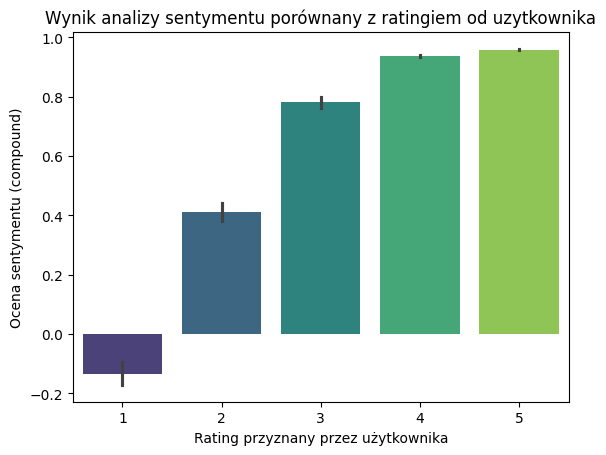

In [91]:
custom_palette2 = sns.color_palette("viridis", len(df['Rating'].unique()))
ax = sns.barplot(data=df, x="Rating", y="compound", hue="Rating", palette=custom_palette2, legend=False) #errorbar=None
ax.set_title("Wynik analizy sentymentu porównany z ratingiem od uzytkownika")
ax.set_ylabel("Ocena sentymentu (compound)")
ax.set_xlabel("Rating przyznany przez użytkownika")
plt.show()

W wykresach słupkowych w Seabornie cienkie czarne linie domyślnie oznaczają 95% przedział ufności. Dla każdego słupka pokazują one zakres, w którym, z pewnym stopniem pewności (tutaj 95%), prawdopodobnie znajduje się prawdziwa wartość dla całej populacji. Im dłuższa linia, tym większy jest przedział ufności, co oznacza większe rozrzucenie możliwych wartości populacyjnych wokół estymowanej średniej.

Powyższy wykres obrazuje zakres wartości compound z analizy sentymentu dla danych z poszczególnym ratingiem przyznanym przez użytkownika.

Dla przypomnienia wartość compound z analizy sentymentu Vader oznacza ogólny wynik sentymentu, który łączy wszystkie wartości pos, neu i neg w jedną w przedziale od -1 do 1, gdzie -1 to jednoznacznie negatywny sentyment, a + 1 pozytywny.

Wartości Rating zostały przyznane przez użytkowników tworzących recenzje, które są wpisane do kolumny Review. Kolumna Rating jest więc wyznacznikiem, który może pomóc określić czy Review pozostawione przez użytkownika ma wydźwięk pozytywny, negatywny, czy neutralny.

Założyć można, że oceny Rating w zakresie 4 do 5 mogą kojarzone być z sentymentem pozytywnym, oceny 1 do 2  negatywnym a ocena 3 z nautralnym.

Na wykresie widać, że:
1) oceny 1 miały ogólny wynik "compound" wokół średnie -1,3
2) oceny 2 plasowały się od około średniej 0.4
3) oceny 3 wartość średnia miary compound wynosi ok 0.8
4) oceny 4 to średnia ok 0.9
5) oceny 5 nieco wyższa niż oceny 4.

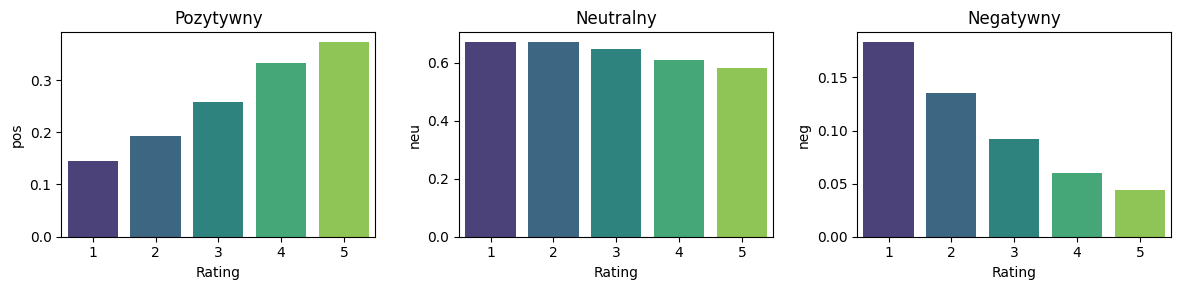

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x="Rating", y="pos", hue="Rating", palette=custom_palette2, legend=False, ax=axs[0], errorbar=None)
sns.barplot(data=df, x="Rating", y="neu", hue="Rating", palette=custom_palette2, legend=False, ax=axs[1], errorbar=None)
sns.barplot(data=df, x="Rating", y="neg", hue="Rating", palette=custom_palette2, legend=False, ax=axs[2], errorbar=None)
axs[0].set_title("Pozytywny")
axs[1].set_title("Neutralny")
axs[2].set_title("Negatywny")
plt.tight_layout()
plt.show()

Powyższe wykresy obrazują, jak wygląda wynik analizy sentymentu przy pomocy narzędzia Vader, dla poszczególnych atrybutów wskazywanych przez algorytm, czy atrybutu:
1) "pos" oznaczającego sentyment pozytywny
2) "neu" czyli sentyment neutralny
3) "neg" czyli sentyment negatywny.

Na osi X znajdują się ponownie oceny przyznane przez użytkowników w kolumnie Rating z zakresu 1 do 5.

Na wykresie widać, że wskaźnik pos wzrasta liniowo wraz ze wzorstem ocen rating.
Przeciwnie, wzkaźnik neg maleje liniowo wraz ze wzrostem oceny Rating.
Wskaźnik neu jest bardziej wypłaszczony, jednak ma tendencję malejącą wraz ze wzrostem oceny Rating.

Powyższe dane mogą być wykorzystane do próby zgadnięcia oceny liczbowej lub oceny sentymentu i porównania z oryginalnymi ocenami Rating dla każdego wpisu.

## <span style="color:#c125ea "> Próba przyznania sentymentu na podstawie wskaźników uzyskanych przy pomocy biblioteki Vader i porównywanie ich do sentymentu przyznanego na podstawie kolumny Rating </span>

### <span style="color: #25ea3a"> Stworzenie nowej kolumny z senstymentem zależnym od oceny użytownika w kolumnie Rating  </span>

Stworzę nową kolumnę w df, która wskaże jaki sentyment ma wpis danego użytkownika. Wskazanie sentymentu w tej kolumnie odbywać się będzie jedynie na podstawie oceny użytkownika w kolumnie Rating, przy założeniach:
1) Oceny 1, 2 - sentyment negatywny
2) Ocena 3 - sentyment neutralny
3) Ocena 4, 5 - sentyment pozytywny

In [93]:
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'negatywny'
    elif rating == 3:
        return 'neutralny'
    elif rating in [4, 5]:
        return 'pozytywny'
    else:
        return 'brak_sentimentu'

In [94]:
df['Sentyment_od_Ratingu'] = df['Rating'].apply(map_sentiment)

In [95]:
# Przesunięcie kolumny na 3 pozycję od lewej
cols = list(df.columns)
cols = cols[:2] + ['Sentyment_od_Ratingu'] + cols[2:-1]
df = df[cols]

In [96]:
df.head()

,Review,Rating,Sentyment_od_Ratingu,neg,neu,pos,compound
0,nice hotel expensive parking got good deal sta...,4,pozytywny,0.072,0.640,0.288,0.9747
1,ok nothing special charge diamond member hilto...,2,negatywny,0.112,0.696,0.192,0.9787
2,nice rooms not experience hotel monaco seattle...,3,neutralny,0.076,0.685,0.240,0.9910
3,unique great stay wonderful time hotel monaco ...,5,pozytywny,0.017,0.549,0.433,0.9946
4,great stay great stay went seahawk game awesom...,5,pozytywny,0.104,0.637,0.258,0.9906


In [97]:
df["Sentyment_od_Ratingu"].value_counts()
# Liczba rekordów w df z określonym na bazie kolumny Rating sentymentem

Sentyment_od_Ratingu
pozytywny    15093
negatywny     3214
neutralny     2184
Name: count, dtype: int64

### <span style="color: #25ea3a"> Próba wskazania sentymentu na bazie wskaźnika **compound** </span>

#### Obliczenie dla jakich wartości **"compound"** przyznawać określony sentyment

In [98]:
# Grupowanie danych po 'Rating' i obliczenie średniej oraz odchylenia standardowego
grouped = df.groupby('Rating')['compound']
mean = grouped.mean()
std = grouped.std()
count = grouped.count()

# Obliczenie przedziału ufności dla średnich z kolumny "compound"
confidence_interval = 1.96 * (std / count.pow(0.5))  # Dla 95% przedziału ufności

# Tworzenie tabeli z wartościami przedziału ufności
confidence_interval_df = pd.DataFrame({
    'Rating': mean.index,
    'Średnia z compound': mean.values,
    'Przedział ufności +/-': confidence_interval.values
})

# Dodanie do ramki danych górnego i dolnej wartości z przedziału ufności
confidence_interval_df['Dolny przedział ufności'] = confidence_interval_df['Średnia z compound'] - confidence_interval_df['Przedział ufności +/-']
confidence_interval_df['Górny przedział ufności'] = confidence_interval_df['Średnia z compound'] + confidence_interval_df['Przedział ufności +/-']

In [99]:
confidence_interval_df


,Rating,Średnia z compound,Przedział ufności +/-,Dolny przedział ufności,Górny przedział ufności
0,1,-0.134023,0.038740,-0.172763,-0.095283
1,2,0.410197,0.031721,0.378476,0.441918
2,3,0.781829,0.017111,0.764718,0.798940
3,4,0.937204,0.004113,0.933091,0.941318
4,5,0.958613,0.002423,0.956190,0.961037


#### Określanie sentymentu na podstawie kolumny **"compound"**

In [100]:
def map__compound_sentiment(compound):
    if -1 <= compound <= 0.441918:
        return 'negatywny'
    elif 0.441918 < compound <= 0.798940:
        return 'neutralny'
    elif compound > 0.798940:
        return 'pozytywny'
    else:
        return 'brak_sentymentu'

In [101]:
df['Sentyment_od_compound'] = df['compound'].apply(map__compound_sentiment)

In [103]:
df["Sentyment_od_compound"].value_counts()

Sentyment_od_compound
pozytywny    17338
negatywny     2045
neutralny     1108
Name: count, dtype: int64

#### Sprawdzenie ile rekordów zostało zakwalifikowanych do sentymentu zgodnego z tym określonym przez ocenę użytkownika w kolumnie Rating na bazie wskaźnika **"compound"**

In [168]:
pasujace = df[df['Sentyment_od_Ratingu'] == df['Sentyment_od_compound']]
pasujace_comp_count = (pasujace.groupby(['Sentyment_od_Ratingu', 'Sentyment_od_compound'])
                 .size()
                 .reset_index(name='Ilość pasujacych rekordów'))

In [170]:
pasujace_comp_count

,Sentyment_od_Ratingu,Sentyment_od_compound,Ilość pasujacych rekordów
0,negatywny,negatywny,1602
1,neutralny,neutralny,233
2,pozytywny,pozytywny,14468


In [172]:
pasujace_comp_count.drop(columns=['Sentyment_od_compound'], inplace=True)

In [173]:
pasujace_comp_count.rename(columns={"Sentyment_od_Ratingu":"Sentyment"}, inplace=True)

In [174]:
pasujace_comp_count.set_index(['Sentyment'], inplace=True)

In [177]:
pasujace_comp_count.rename(columns={"Ilość pasujacych rekordów":"Zgodna ocena sentymentu dla Compound"}, inplace= True)

In [178]:
pasujace_comp_count

,Zgodna ocena sentymentu dla Compound
Sentyment,
negatywny,1602
neutralny,233
pozytywny,14468


### <span style="color: #25ea3a"> Próba wskazania sentymentu na bazie wskaźnika **pos** </span>

#### Obliczanie dla jakich wartości **"pos"** przyznawać określony sentyment

In [119]:
# Grupowanie danych po 'Rating' i obliczenie średniej oraz odchylenia standardowego
grouped = df.groupby('Rating')['pos']
mean = grouped.mean()
std = grouped.std()
count = grouped.count()

# Obliczenie przedziału ufności dla średnich z kolumny "pos"
confidence_interval = 1.96 * (std / count.pow(0.5))  # Dla 95% przedziału ufności

# Tworzenie tabeli z wartościami przedziału ufności
confidence_interval_df = pd.DataFrame({
    'Rating': mean.index,
    'Średnia z pos': mean.values,
    'Przedział ufności +/-': confidence_interval.values
})

# Dodanie do ramki danych górnego i dolnej wartości z przedziału ufności
confidence_interval_df['Dolny przedział ufności'] = confidence_interval_df['Średnia z pos'] - confidence_interval_df['Przedział ufności +/-']
confidence_interval_df['Górny przedział ufności'] = confidence_interval_df['Średnia z pos'] + confidence_interval_df['Przedział ufności +/-']

In [120]:
confidence_interval_df

,Rating,Średnia z pos,Przedział ufności +/-,Dolny przedział ufności,Górny przedział ufności
0,1,0.145700,0.003766,0.141934,0.149465
1,2,0.193166,0.003648,0.189517,0.196814
2,3,0.258782,0.003928,0.254854,0.262710
3,4,0.332121,0.002635,0.329486,0.334756
4,5,0.372683,0.002263,0.370419,0.374946


#### Określanie sentymentu na podstawie **"pos"**

In [121]:
def map__pos_sentiment(pos):
    if -1 <= pos < 0.254854:
        return 'negatywny'
    elif 0.254854 <= pos <= 0.262710:
        return 'neutralny'
    elif pos > 0.262710:
        return 'pozytywny'
    else:
        return 'brak_sentymentu'

In [122]:
df['Sentyment_od_pos'] = df['pos'].apply(map__pos_sentiment)

In [123]:
df["Sentyment_od_pos"].value_counts()

Sentyment_od_pos
pozytywny    13501
negatywny     6467
neutralny      523
Name: count, dtype: int64

#### Sprawdzenie ile rekordów zostało zakwalifikowanych do sentymentu zgodnego z tym określonym przez ocenę użytkownika w kolumnie Rating na bazie wskaźnika **"pos"**

In [124]:
pasujace_pos = df[df['Sentyment_od_Ratingu'] == df['Sentyment_od_pos']]
pasujace_pos_count = (pasujace_pos.groupby(['Sentyment_od_Ratingu', 'Sentyment_od_pos'])
                 .size()
                 .reset_index(name='Ilość pasujacych rekordów'))

In [125]:
pasujace_pos_count

,Sentyment_od_Ratingu,Sentyment_od_pos,Ilość pasujacych rekordów
0,negatywny,negatywny,2763
1,neutralny,neutralny,72
2,pozytywny,pozytywny,12151


In [133]:
pasujace_pos_count.drop(columns=['Sentyment_od_pos'], inplace=True)

In [138]:
pasujace_pos_count.rename(columns={"Sentyment_od_Ratingu":"Sentyment"}, inplace=True)

In [139]:
pasujace_pos_count.set_index(['Sentyment'], inplace=True)

In [175]:
pasujace_pos_count.rename(columns={"Ilość pasujacych rekordów":"Zgodna ocena sentymentu dla POS"}, inplace=True)

In [176]:
pasujace_pos_count

,Zgodna ocena sentymentu dla POS
Sentyment,
negatywny,2763
neutralny,72
pozytywny,12151


### <span style="color: #25ea3a"> Próba wskazania sentymentu na bazie wskaźnika **neg** </span>

#### Obliczanie dla jakich wartości **"neg"** przyznawać określony sentyment

In [126]:
# Grupowanie danych po 'Rating' i obliczenie średniej oraz odchylenia standardowego
grouped = df.groupby('Rating')['neg']
mean = grouped.mean()
std = grouped.std()
count = grouped.count()

# Obliczenie przedziału ufności dla średnich z kolumny "neg"
confidence_interval = 1.96 * (std / count.pow(0.5))  # Dla 95% przedziału ufności

# Tworzenie tabeli z wartościami przedziału ufności
confidence_interval_df = pd.DataFrame({
    'Rating': mean.index,
    'Średnia z neg': mean.values,
    'Przedział ufności +/-': confidence_interval.values
})

# Dodanie do ramki danych górnego i dolnej wartości z przedziału ufności
confidence_interval_df['Dolny przedział ufności'] = confidence_interval_df['Średnia z neg'] - confidence_interval_df['Przedział ufności +/-']
confidence_interval_df['Górny przedział ufności'] = confidence_interval_df['Średnia z neg'] + confidence_interval_df['Przedział ufności +/-']

In [127]:
confidence_interval_df

,Rating,Średnia z neg,Przedział ufności +/-,Dolny przedział ufności,Górny przedział ufności
0,1,0.183267,0.004443,0.178824,0.187711
1,2,0.135006,0.003112,0.131894,0.138118
2,3,0.092440,0.002475,0.089965,0.094915
3,4,0.059578,0.001195,0.058383,0.060773
4,5,0.043675,0.000871,0.042804,0.044546


#### Określanie sentymentu na podstawie **"neg"**

In [128]:
def map__neg_sentiment(neg):
    if 0.138118 <= neg <= 1:
        return 'negatywny'
    elif 0.089965 <= neg < 0.138118:
        return 'neutralny'
    elif neg < 0.089965:
        return 'pozytywny'
    else:
        return 'brak_sentymentu'

In [129]:
df['Sentyment_od_neg'] = df['neg'].apply(map__neg_sentiment)

In [130]:
df["Sentyment_od_neg"].value_counts()

Sentyment_od_neg
pozytywny    14150
neutralny     3553
negatywny     2788
Name: count, dtype: int64

#### Sprawdzenie ile rekordów zostało zakwalifikowanych do sentymentu zgodnego z tym określonym przez ocenę użytkownika w kolumnie Rating na bazie wskaźnika **"neg"**

In [131]:
pasujace_neg = df[df['Sentyment_od_Ratingu'] == df['Sentyment_od_neg']]
pasujace_neg_count = (pasujace_neg.groupby(['Sentyment_od_Ratingu', 'Sentyment_od_neg'])
                 .size()
                 .reset_index(name='Ilość pasujacych rekordów'))

In [132]:
pasujace_neg_count

,Sentyment_od_Ratingu,Sentyment_od_neg,Ilość pasujacych rekordów
0,negatywny,negatywny,1735
1,neutralny,neutralny,633
2,pozytywny,pozytywny,12446


In [141]:
pasujace_neg_count.drop(columns=['Sentyment_od_neg'], inplace=True)

In [144]:
pasujace_neg_count.rename(columns={"Sentyment_od_Ratingu":"Sentyment"}, inplace=True)

In [145]:
pasujace_neg_count.set_index(['Sentyment'], inplace=True)

In [147]:
pasujace_neg_count.rename(columns={"Ilość pasujacych rekordów":"Zgodna ocena sentymentu dla NEG"}, inplace=True)

In [148]:
pasujace_neg_count

,Zgodna ocena sentymentu dla NEG
Sentyment,
negatywny,1735
neutralny,633
pozytywny,12446


### <span style="color: #25ea3a"> Podsumowanie, porównanie wyników na bazie 3 wskaźników </span>

In [188]:
# Liczenie liczby etykiet "pozytywne", "neutralne", "negatywne" w kolumnie 'Sentyment_od_Ratingu'
rating_sentiment_count = df['Sentyment_od_Ratingu'].value_counts().reset_index()
rating_sentiment_count.columns = ['Sentyment', 'Na podstawie Rating']
rating_sentiment_count.set_index(['Sentyment'], inplace=True)


In [192]:
podsumowanie = rating_sentiment_count.join(pasujace_comp_count)
podsumowanie = podsumowanie.join(pasujace_pos_count)
podsumowanie = podsumowanie.join(pasujace_neg_count)

In [193]:
podsumowanie

,Na podstawie Rating,Zgodna ocena sentymentu dla Compound,Zgodna ocena sentymentu dla POS,Zgodna ocena sentymentu dla NEG
Sentyment,,,,
pozytywny,15093,14468,12151,12446
negatywny,3214,1602,2763,1735
neutralny,2184,233,72,633


In [201]:
wartosci_procentowe = podsumowanie.copy()

In [202]:
for column in wartosci_procentowe.columns[1:]:
    wartosci_procentowe[column] = round((wartosci_procentowe[column] / wartosci_procentowe['Na podstawie Rating']) * 100, 2)

In [203]:
wartosci_procentowe

,Na podstawie Rating,Zgodna ocena sentymentu dla Compound,Zgodna ocena sentymentu dla POS,Zgodna ocena sentymentu dla NEG
Sentyment,,,,
pozytywny,15093,95.86,80.51,82.46
negatywny,3214,49.84,85.97,53.98
neutralny,2184,10.67,3.30,28.98


# <span style="color:#25dbea "> Podsumowanie </span>

In [204]:
podsumowanie

,Na podstawie Rating,Zgodna ocena sentymentu dla Compound,Zgodna ocena sentymentu dla POS,Zgodna ocena sentymentu dla NEG
Sentyment,,,,
pozytywny,15093,14468,12151,12446
negatywny,3214,1602,2763,1735
neutralny,2184,233,72,633


In [205]:
wartosci_procentowe

,Na podstawie Rating,Zgodna ocena sentymentu dla Compound,Zgodna ocena sentymentu dla POS,Zgodna ocena sentymentu dla NEG
Sentyment,,,,
pozytywny,15093,95.86,80.51,82.46
negatywny,3214,49.84,85.97,53.98
neutralny,2184,10.67,3.30,28.98


Najlepiej poradziła sobie ocena sentymentu na bazie miary "pos" określającej pozytywny sentyment wypowiedzi.

Przyporządkowując sentyment na bazie tej miary udało się osiągnąć wysoką zgodność z sentymentem przyznanym na bazie ocen użytkowników.

Dla przypomnienia: Sentyment na bazie kolumny Rating, gdzie użytkownicy piszący recenzje stawiali ocenę w skali od 1 do 5. Założono, że oceny 1 - 2 oznaczają sentyment negatywny, ocena 3 - neutralny, a oceny 4 do 5 sentyemnt pozytywny.

Próbując zgadnąć sentyment na podstawie samej wypowiedzi przy użyciu miary pos obliczanej przez algorytm Vader z biblioteki NLTK, uzyskano:
1) 80,5% skuteczności w określaniu sentymentu pozytywnego
2) 86% skuteczności w określaniu sentymentu negatywnego
3) 3% skutecznośc w określaniu sentymentu neutralnego.


Wyniki w przypadku skrajnych sentymentów wydaja się bardzo zadowalające biorąc pod uwagę, że model nie był wcześniej trenowany na tych danych. Jednocześniej dane zostąły poddane czyszczeniu.

Wynik 3% dla sentymentu neutralnego wymagałby poprawy i testowania innych parametrów i zakresów.

Dla przypomnienia: zakresy jak przyporządkowywać sentyment na bazie miar podjęto przez obliczenie średniej miar dla każdej z ocen z kolumny Rating, następnie obliczono 90% przedział ufności i granice wyznaczono na bazie górnego i dolnego przedziału ufności.